In [3]:
import pandas as pd

In [14]:
std = pd.read_csv('Dataset/StudentsPerformance.csv')
std.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
std = std.rename(columns={"race/ethnicity":"group","parental level of education":"education","test preparation course":"course_completation","math score":"math_score","reading score":"reading_score","writing score":"writing_score"})
std.head()

,gender,group,education,lunch,course_completation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
from sklearn.preprocessing import StandardScaler
features = ['math_score', 'reading_score', 'writing_score'] 
# Separating out the features
x = std.loc[:, features].values 
# Separating out the target
y = std.loc[:,['gender']].values 

In [21]:
print(x)

[[72 72 74]
 [69 90 88]
 [90 95 93]
 ...
 [59 71 65]
 [68 78 77]
 [77 86 86]]


In [22]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [23]:
print(x)

[[ 0.39002351  0.19399858  0.39149181]
 [ 0.19207553  1.42747598  1.31326868]
 [ 1.57771141  1.77010859  1.64247471]
 ...
 [-0.46775108  0.12547206 -0.20107904]
 [ 0.12609287  0.60515772  0.58901542]
 [ 0.71993682  1.15336989  1.18158627]]


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])

In [26]:
finalDf = pd.concat([principalDf, std[['gender']]], axis = 1)
print(finalDf)

     principal component 1  principal component 2  gender
0                -0.560514               0.088285  female
1                -1.719201              -0.910745  female
2                -2.883135              -0.021999  female
3                 2.119921              -0.074994    male
4                -0.988094               0.131914    male
5                -1.123100              -0.349250  female
6                -2.771296              -0.103735  female
7                 3.135228               0.025667    male
8                 0.326128               0.042207    male
9                 2.096265              -0.810073  female
10                1.529488               0.378591    male
11                2.616885              -0.307769    male
12               -0.629468              -0.489315  female
13               -0.625589               0.529076    male
14                1.630921              -0.203127  female
15               -0.726514              -0.261883  female
16            

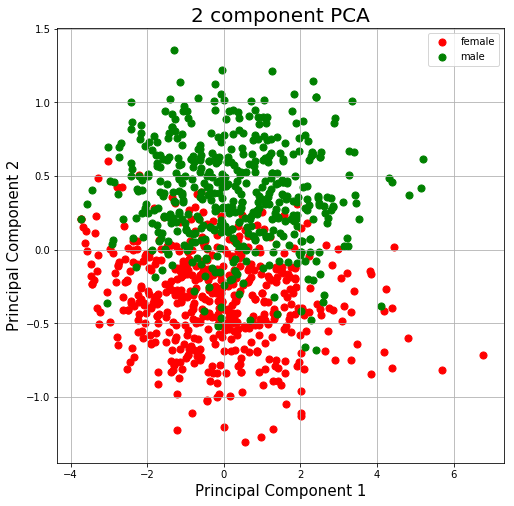

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['female', 'male']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['gender'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [29]:
pca.explained_variance_ratio_

array([0.90614325, 0.07886171])

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('blood-transfusion-service-center')

In [2]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()# Fit on training set only.
scaler.fit(train_img)# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [4]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [5]:
pca.fit(train_img)

PCA(n_components=0.95)

In [6]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [9]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression()

In [10]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['1'], dtype=object)

In [11]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

array(['1', '1', '1', '1', '2', '1', '1', '1', '1', '1'], dtype=object)

In [12]:
logisticRegr.score(test_img, test_lbl)

0.7009345794392523